# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

In [3]:
#Create df to store data
city_weather = pd.DataFrame({'City': cities, 'Cloudiness': "", 'Country': "countries", 'Date': "",
                             'Humidity': "", 'Lat': "", 'Lng': "", 'Max Temp': "", 'Windspeed': ""})


#Preview df
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,conway,,countries,,,,,,
1,sao joao da barra,,countries,,,,,,
2,khatanga,,countries,,,,,,
3,taolanaro,,countries,,,,,,
4,mataura,,countries,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Variables to keep track of response number
City_name = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []

index_counter = 0
set_counter = 1
limit = 50
new_limit = 49


#Run API call for every city and base url to make the api call
print('''
Beginning Data Retrieval
-----------------------------''')

for index, city in enumerate(cities, 1):
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    query = base_url + "appid=" + weather_api_key + '&units=imperial' + "&q=" + city
    response = requests.get(query)
    city_json = response.json()
    
    try:
        City_name.append(city_json['name'])
        Lat.append(city_json["coord"]['lat'])
        Lng.append(city_json["coord"]['lon'])
        Max_Temp.append(city_json['main']['temp_max'])
        Humidity.append(city_json['main']['humidity'])
        Cloudiness.append(city_json['clouds']['all'])
        Wind_Speed.append(city_json["wind"]["speed"])
        Country.append(city_json['sys']['country'])
        Date.append(city_json['dt'])
        if index_counter == limit:
            limit = new_limit
            index_counter = 0
            set_counter = set_counter + 1
            
        else:
            index_counter = index_counter + 1
        print(f'Processing Record {index_counter} of Set{set_counter}: {city}')
    
    except:
        print('City not found. Skipping...')
        time.sleep(2)
        
city_data = pd.DataFrame({'City':City_name,
                          'Lat':Lat,
                          'Lng':Lng,
                          'Max Temp':Max_Temp,
                          'Humidity':Humidity,
                          'Cloudiness':Cloudiness,
                          'Wind Speed':Wind_Speed,
                          'Country':Country,
                          'Date':Date})

print('''
-----------------------------
Data Retrival Complete''')


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set1: conway
Processing Record 2 of Set1: sao joao da barra
Processing Record 3 of Set1: khatanga
City not found. Skipping...
Processing Record 4 of Set1: mataura
Processing Record 5 of Set1: rikitea
Processing Record 6 of Set1: lyubytino
Processing Record 7 of Set1: punta arenas
Processing Record 8 of Set1: hobart
Processing Record 9 of Set1: bathsheba
Processing Record 10 of Set1: merauke
City not found. Skipping...
Processing Record 11 of Set1: bambous virieux
Processing Record 12 of Set1: nalut
Processing Record 13 of Set1: new norfolk
Processing Record 14 of Set1: morant bay
Processing Record 15 of Set1: khandyga
Processing Record 16 of Set1: busselton
Processing Record 17 of Set1: volnovakha
Processing Record 18 of Set1: bredasdorp
Processing Record 19 of Set1: barrow
Processing Record 20 of Set1: gallup
Processing Record 21 of Set1: karachi
Processing Record 22 of Set1: esperance
Processing Record 23 

Processing Record 42 of Set4: ostrovnoy
Processing Record 43 of Set4: ancud
Processing Record 44 of Set4: sitka
Processing Record 45 of Set4: selenginsk
Processing Record 46 of Set4: kungurtug
Processing Record 47 of Set4: lompoc
Processing Record 48 of Set4: abu samrah
Processing Record 49 of Set4: colwyn bay
Processing Record 0 of Set5: tarakan
Processing Record 1 of Set5: corinto
Processing Record 2 of Set5: cidreira
Processing Record 3 of Set5: grindavik
Processing Record 4 of Set5: jieshou
Processing Record 5 of Set5: san vicente
Processing Record 6 of Set5: san francisco
Processing Record 7 of Set5: lavrentiya
Processing Record 8 of Set5: waddan
Processing Record 9 of Set5: luderitz
Processing Record 10 of Set5: japura
City not found. Skipping...
Processing Record 11 of Set5: loviisa
Processing Record 12 of Set5: hamilton
Processing Record 13 of Set5: tual
Processing Record 14 of Set5: mahajanga
Processing Record 15 of Set5: loa janan
Processing Record 16 of Set5: lewisporte
Proc

Processing Record 44 of Set8: show low
Processing Record 45 of Set8: tautira
Processing Record 46 of Set8: namatanai
Processing Record 47 of Set8: nieuw amsterdam
Processing Record 48 of Set8: kobryn
Processing Record 49 of Set8: yuksekova
Processing Record 0 of Set9: belmonte
Processing Record 1 of Set9: bubaque
Processing Record 2 of Set9: sokoni
Processing Record 3 of Set9: mount gambier
Processing Record 4 of Set9: ternate
Processing Record 5 of Set9: kilindoni
Processing Record 6 of Set9: nhulunbuy
Processing Record 7 of Set9: atbasar
Processing Record 8 of Set9: ternuvate
Processing Record 9 of Set9: ahipara
City not found. Skipping...
Processing Record 10 of Set9: atambua
Processing Record 11 of Set9: san cristobal
Processing Record 12 of Set9: bandarbeyla
Processing Record 13 of Set9: kajaani
Processing Record 14 of Set9: fonte boa
Processing Record 15 of Set9: achhnera
Processing Record 16 of Set9: provost
Processing Record 17 of Set9: avera
Processing Record 18 of Set9: baruu

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
#Clean df to remove cities not found
#city_weather['Max Temp'] = city_weather['Max Temp'].replace('', np.nan)
#city_weather = city_weather.dropna()

#Save df
#city_weather.to_csv("..Instructions/output_data/cities.csv", index=False, header=True)

#Preview df
#city_weather.head()

In [11]:
#Preview df
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Conway,35.0887,-92.4421,55.38,81,90,5.99,US,1635557217
1,São João da Barra,-21.6403,-41.0511,70.56,87,100,16.26,BR,1635557407
2,Khatanga,71.9667,102.5000,5.86,85,100,8.03,RU,1635557209
3,Mataura,-46.1927,168.8643,74.50,38,57,5.01,NZ,1635557409
4,Rikitea,-23.1203,-134.9692,75.54,81,100,15.68,PF,1635557409


In [7]:
#Convert the array
city_data.to_csv(output_data_file, encoding= "utf-8", index = False, header= True)

city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,557.000000,557.000000,557.000000,557.000000,557.000000,557.000000,5.570000e+02
mean,21.051884,17.685997,58.886391,74.105925,56.768402,7.254704,1.635557e+09
std,32.593532,90.633355,22.103965,18.762849,39.577197,4.889390,1.743663e+02
min,-54.800000,-175.200000,-14.400000,13.000000,0.000000,0.000000,1.635557e+09
25%,-5.556900,-60.673300,44.650000,65.000000,16.000000,3.580000,1.635557e+09
50%,26.250000,21.548200,64.740000,78.000000,71.000000,6.080000,1.635558e+09
75%,48.681400,100.579200,76.500000,88.000000,98.000000,10.250000,1.635558e+09
max,78.218600,179.316700,93.690000,100.000000,100.000000,27.890000,1.635558e+09


In [12]:
#weathercheck
weatherwithhumidityover100 = city_data.loc[city_data["Humidity"] > 100]
weatherwithhumidityover100.index


citydataafterdropping = city_data.drop(weatherwithhumidityover100.index,  inplace = False)
citydataafterdropping.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Conway,35.0887,-92.4421,55.38,81,90,5.99,US,1635557217
1,São João da Barra,-21.6403,-41.0511,70.56,87,100,16.26,BR,1635557407
2,Khatanga,71.9667,102.5000,5.86,85,100,8.03,RU,1635557209
3,Mataura,-46.1927,168.8643,74.50,38,57,5.01,NZ,1635557409
4,Rikitea,-23.1203,-134.9692,75.54,81,100,15.68,PF,1635557409


In [13]:
city_data_duplicate = pd.DataFrame({'City':City_name,
                                    'Lat':Lat,
                                    'Lng':Lng,
                                    'Max Temp':Max_Temp,
                                    'Humidity':Humidity,
                                    'Cloudiness':Cloudiness,
                                    'Wind Speed':Wind_Speed,
                                    'Country':Country,
                                    'Date':Date})

city_data_duplicate.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Conway,35.0887,-92.4421,55.38,81,90,5.99,US,1635557217
1,São João da Barra,-21.6403,-41.0511,70.56,87,100,16.26,BR,1635557407
2,Khatanga,71.9667,102.5000,5.86,85,100,8.03,RU,1635557209
3,Mataura,-46.1927,168.8643,74.50,38,57,5.01,NZ,1635557409
4,Rikitea,-23.1203,-134.9692,75.54,81,100,15.68,PF,1635557409


In [22]:
#Converting/using quartile function to find upper/lower bounds
humidity = city_data_duplicate["Humidity"]
quartiles = humidity.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print("--------------------------------------------")
print(f"Lower quartile of Humidity is: {lowerq}")
print(f"Upper quartile of Humidity is: {upperq}")
print(f"Interquartile range of Humidity is: {iqr}")
print(f"Humidity Median: {quartiles[0.5]} ")
print(f"Values below {lower_bound} are possibly outliers")
print(f"Values above {upper_bound} are possibly outliers")
print("--------------------------------------------")

--------------------------------------------
Lower quartile of Humidity is: 65.0
Upper quartile of Humidity is: 88.0
Interquartile range of Humidity is: 23.0
Humidity Median: 78.0 
Values below 30.5 are possibly outliers
Values above 122.5 are possibly outliers
--------------------------------------------


In [27]:
#Reviewing any data in outlier activity to preview for the below inspection
outlier_humidity = city_data_duplicate.loc[(city_data_duplicate['Humidity'] < lower_bound) | (city_data_duplicate['Humidity'] > upper_bound)]
outlier_humidity

clean_city_data = city_data_duplicate.drop(outlier_humidity.index,  inplace = False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Conway,35.0887,-92.4421,55.38,81,90,5.99,US,1635557217
1,São João da Barra,-21.6403,-41.0511,70.56,87,100,16.26,BR,1635557407
2,Khatanga,71.9667,102.5000,5.86,85,100,8.03,RU,1635557209
3,Mataura,-46.1927,168.8643,74.50,38,57,5.01,NZ,1635557409
4,Rikitea,-23.1203,-134.9692,75.54,81,100,15.68,PF,1635557409


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#Based on the above, the upper bounds in my dataset for humidity was 88%, 
#therefore I don't have any cities in my data set with humidity over 100%

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

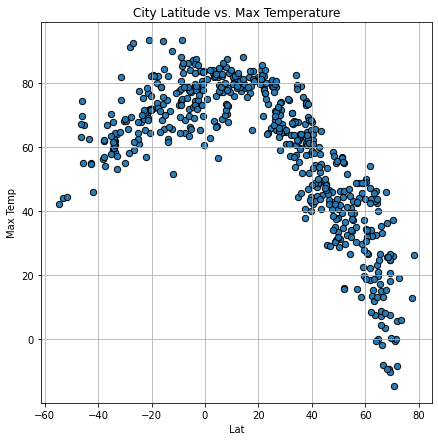

In [64]:
#Plotting City Latitude vs Max Temp
clean_city_data.plot(kind="scatter", x="Lat", y="Max Temp", 
                     grid=True, figsize=(7,7),marker="o", 
                     facecolors="blue", edgecolors="black",
                     title="City Latitude vs. Max Temperature",
                     alpha=0.95,s = 40)

plt.savefig("../output_data/Fig 1.png")
plt.show()

## Latitude vs. Humidity Plot

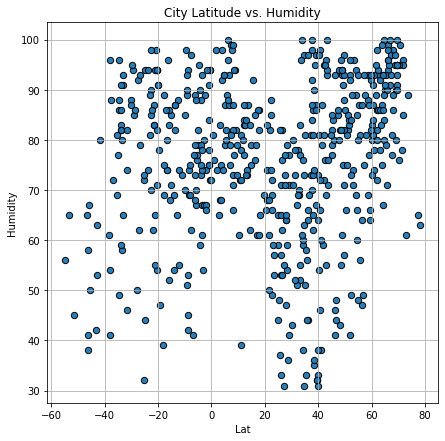

In [65]:
#Plotting City Latitude vs Humidity

clean_city_data.plot(kind="scatter", x="Lat", y="Humidity", 
                     grid=True, figsize=(7,7),marker="o", 
                     facecolors="blue", edgecolors="black",
                     title="City Latitude vs. Humidity",
                     alpha=0.95,s = 40)

plt.savefig("../output_data/Fig 2.png")
plt.show()

## Latitude vs. Cloudiness Plot

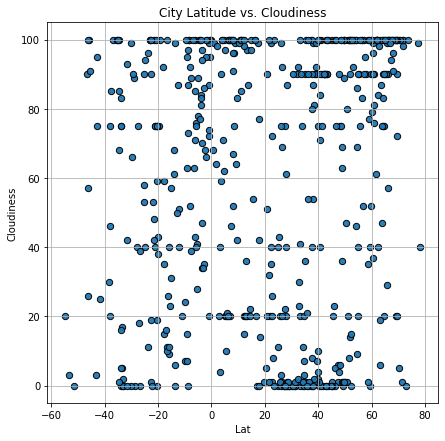

In [66]:
#Plotting City Latitude vs Cloudiness

clean_city_data.plot(kind="scatter", x="Lat", y="Cloudiness", 
                     grid=True, figsize=(7,7),marker="o", 
                     facecolors="blue", edgecolors="black",
                     title="City Latitude vs. Cloudiness",
                     alpha=0.95,s = 40)

plt.savefig("../output_data/Fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

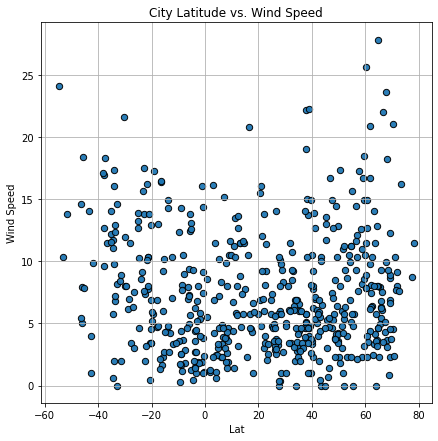

In [67]:
#Plotting City Latitude vs Wind Speed

clean_city_data.plot(kind="scatter", x="Lat", y="Wind Speed",
                     grid=True, figsize=(7,7),marker="o", 
                     facecolors="blue", edgecolors="black",
                     title="City Latitude vs. Wind Speed",
                     alpha=0.95,s = 40)
plt.savefig("../output_data/Fig4.png")
plt.show()

## Linear Regression

In [32]:
#Generate head of df as preview for Northern Data
Nothern_Hemisphere_data = clean_city_data.loc[clean_city_data["Lat"]>=0]
Nothern_Hemisphere_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Conway,35.0887,-92.4421,55.38,81,90,5.99,US,1635557217
2,Khatanga,71.9667,102.5000,5.86,85,100,8.03,RU,1635557209
5,Lyubytino,58.8122,33.3922,45.86,93,35,8.19,RU,1635557410
8,Bathsheba,13.2167,-59.5167,79.41,73,20,11.50,BB,1635556698
11,Nālūt,30.3333,10.8500,64.90,43,0,5.03,LY,1635557413


In [36]:
#Generate head of df as preview for Southern Data
Southern_Hemisphere_data = clean_city_data.loc[clean_city_data["Lat"]<0]
Southern_Hemisphere_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,São João da Barra,-21.6403,-41.0511,70.56,87,100,16.26,BR,1635557407
3,Mataura,-46.1927,168.8643,74.50,38,57,5.01,NZ,1635557409
4,Rikitea,-23.1203,-134.9692,75.54,81,100,15.68,PF,1635557409
6,Punta Arenas,-53.1500,-70.9167,44.11,65,3,10.36,CL,1635557183
7,Hobart,-42.8794,147.3294,55.26,63,75,1.01,AU,1635557121


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.770671085650636
(Northern Hemisphere  - Max Temp vs. Latitude)R value is: 0.770671085650636
(Northern Hemisphere  - Max Temp vs. Latitude)Linear Regression is: y = -1.04x + 94.0


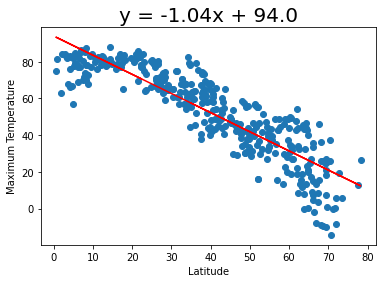

In [56]:
#Calculating trend analysis, and r-value differential
x_values = Nothern_Hemisphere_data['Lat']
y_values = Nothern_Hemisphere_data['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'{line_eq}',color = 'black', fontsize = 20)
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
print(f"The r-value is: {rvalue**2}")
print(f"\033[1m(Northern Hemisphere  - Max Temp vs. Latitude)R value is:\033[1m {rvalue**2}" )
print(f"\033[1m(Northern Hemisphere  - Max Temp vs. Latitude)Linear Regression is:\033[1m {line_eq}" )
plt.savefig("../output_data/Fig 5.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.38479274640353256
(Southern Hemisphere- Max Temp vs. Latitude)R value is: 0.38479274640353256
(Southern Hemisphere- Max Temp vs. Latitude)Linear Regression is: y = 0.46x + 80.07


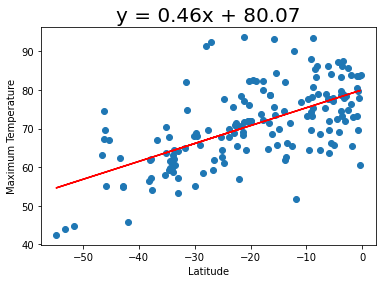

In [55]:
#Calculating trend analysis, and r-value differential
x_values = Southern_Hemisphere_data['Lat']
y_values = Southern_Hemisphere_data['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.title(f'{line_eq}',color = 'black', fontsize = 20)
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
print(f"The r-value is: {rvalue**2}")
print(f"\033[1m(Southern Hemisphere- Max Temp vs. Latitude)R value is:\033[1m {rvalue**2}" )
print(f"\033[1m(Southern Hemisphere- Max Temp vs. Latitude)Linear Regression is:\033[1m {line_eq}" )
plt.savefig("../output_data/Fig 6.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.04144564553571975
(Northern Hemisphere  - Humidity (%) vs. Latitude)R value is: 0.04144564553571975
(Northern Hemisphere  - Humidity (%) vs. Latitude)Linear Regression is: y = 0.17x + 69.46


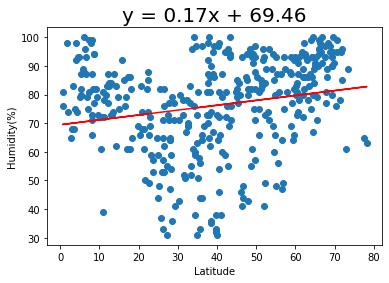

In [54]:
#Calculating trend analysis, and r-value differential

x_values = Nothern_Hemisphere_data['Lat']
y_values = Nothern_Hemisphere_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'{line_eq}',color = 'black', fontsize = 20)
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
print(f"The r-value is: {rvalue**2}")
print(f"\033[1m(Northern Hemisphere  - Humidity (%) vs. Latitude)R value is:\033[1m {rvalue**2}" )
print(f"\033[1m(Northern Hemisphere  - Humidity (%) vs. Latitude)Linear Regression is:\033[1m {line_eq}" )
plt.savefig("../output_data/Fig 7.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.04028696477300879
(Southern Hemisphere- Humidity (%) vs. Latitude)R value is: 0.04028696477300879
(Southern Hemisphere- Humidity (%) vs. Latitude)Linear Regression is: y = 0.23x + 79.41


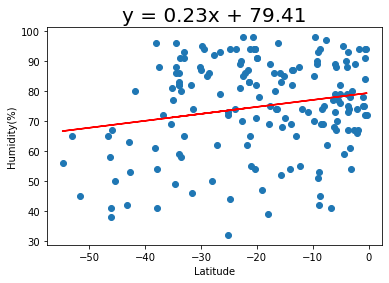

In [53]:
#Calculating trend analysis, and r-value differential

x_values = Southern_Hemisphere_data['Lat']
y_values = Southern_Hemisphere_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'{line_eq}',color = 'black', fontsize = 20)
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
print(f"The r-value is: {rvalue**2}")
print(f"\033[1m(Southern Hemisphere- Humidity (%) vs. Latitude)R value is:\033[1m {rvalue**2}" )
print(f"\033[1m(Southern Hemisphere- Humidity (%) vs. Latitude)Linear Regression is:\033[1m {line_eq}" )
plt.savefig("../output_data/Fig 8.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.03675558771455932
(Northern Hemisphere  - Cloudiness(%) vs. Latitude)R value is: 0.03675558771455932
(Northern Hemisphere  - Cloudiness(%) vs. Latitude)Linear Regression is: y = 0.39x + 41.77


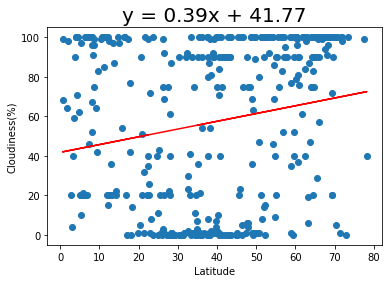

In [52]:
#Calculating trend analysis, and r-value differential

x_values = Nothern_Hemisphere_data['Lat']
y_values = Nothern_Hemisphere_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'{line_eq}',color = 'black', fontsize = 20)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
print(f"The r-value is: {rvalue**2}")
print(f"\033[1m(Northern Hemisphere  - Cloudiness(%) vs. Latitude)R value is:\033[1m {rvalue**2}" )
print(f"\033[1m(Northern Hemisphere  - Cloudiness(%) vs. Latitude)Linear Regression is:\033[1m {line_eq}" )
plt.savefig("../output_data/Fig 9.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.049268378491994745
(Southern Hemisphere- Cloudiness(%) vs. Latitude)R value is: 0.049268378491994745
(Southern Hemisphere- Cloudiness(%) vs. Latitude)Linear Regression is: y = 0.57x + 69.27


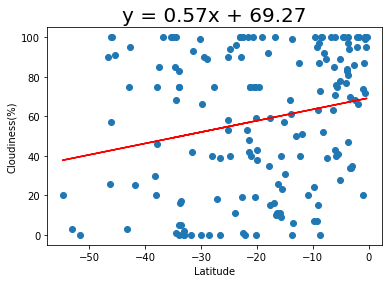

In [51]:
#Calculating trend analysis, and r-value differential
x_values = Southern_Hemisphere_data['Lat']
y_values = Southern_Hemisphere_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'{line_eq}',color = 'black', fontsize = 20)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
print(f"The r-value is: {rvalue**2}")
print(f"\033[1m(Southern Hemisphere- Cloudiness(%) vs. Latitude)R value is:\033[1m {rvalue**2}" )
print(f"\033[1m(Southern Hemisphere- Cloudiness(%) vs. Latitude)Linear Regression is:\033[1m {line_eq}" )
plt.savefig("../output_data/Fig 10 .png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.030494682463801583
(Northern Hemisphere - Wind Speed(mph) vs. Latitude)R square value is: 0.030494682463801583
(Northern Hemisphere - Wind Speed(mph) vs. Latitude)Linear Regression is: y = 0.04x + 5.34


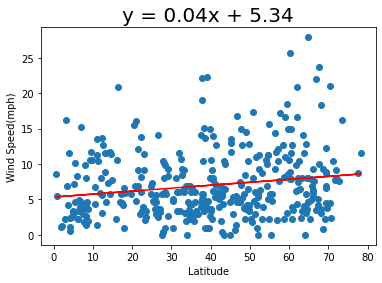

In [70]:
#Calculating trend analysis, and r-value differential

x_values = Nothern_Hemisphere_data['Lat']
y_values = Nothern_Hemisphere_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'{line_eq}',color = 'black', fontsize = 20)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
northern_hemisphere_rvalue = rvalue**2
print(f"The r-value is: {rvalue**2}")
print(f"\033[1m(Northern Hemisphere - Wind Speed(mph) vs. Latitude)R square value is:\033[1m {rvalue**2}" )
print(f"\033[1m(Northern Hemisphere - Wind Speed(mph) vs. Latitude)Linear Regression is:\033[1m {line_eq}" )
plt.savefig("../output_data/Fig 11.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.15926841822746926
(Southern Hemisphere-Wind Speed(mph) vs. Latitude)R square value is: 0.15926841822746926
(Southern Hemisphere-Wind Speed(mph) vs. Latitude)Linear Regression is: y = -0.15x + 4.89


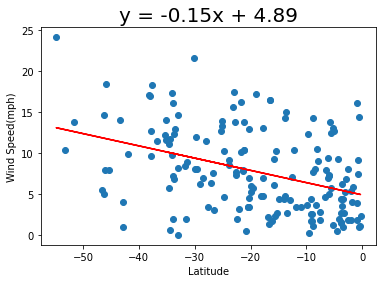

In [71]:
#Calculating trend analysis, and r-value differential

x_values = Southern_Hemisphere_data['Lat']
y_values = Southern_Hemisphere_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title(f'{line_eq}',color = 'black', fontsize = 20)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
print(f"The r-value is: {rvalue**2}")
print(f"\033[1m(Southern Hemisphere-Wind Speed(mph) vs. Latitude)R square value is:\033[1m {rvalue**2}" )
print(f"\033[1m(Southern Hemisphere-Wind Speed(mph) vs. Latitude)Linear Regression is:\033[1m {line_eq}" )
plt.savefig("../output_data/Fig 12.png")
plt.show()